In [1]:
import numpy as np
print ('Problem #1 \n')

theta = 30/180*np.pi
sigma_o_w = 100 # mN/m
sigma_s_w = 300 # mN/m

sigma_s_o = sigma_s_w - np.cos(theta)*sigma_o_w

sigma_s_w = np.cos(np.pi)*0.5*sigma_o_w + sigma_s_o

print ('(a) oil-surface surface energy = %.3f mN/m \n' %sigma_s_o)

print ('(b) water-surface surface energy = %.3f mN/m' %sigma_s_w)

Problem #1 

(a) oil-surface surface energy = 213.397 mN/m 

(b) water-surface surface energy = 163.397 mN/m


Problem #2 

(a) 


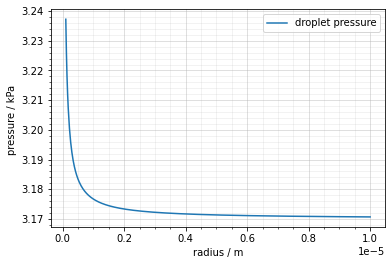

Based on my understanding, this happens because the increased radius having a smaller affects on droplet vapor pressure (because the exp funtion identity), thus it seems like no longer increase 

intermolecular forces: H-bonding and van der Waals force
(b) 


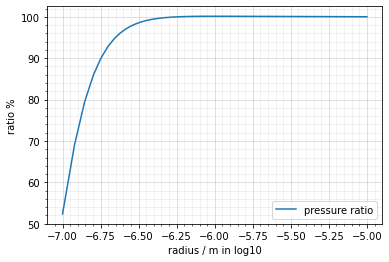

In [2]:
import matplotlib.pyplot as plt
print ('Problem #2 \n')
print ('(a) ')

# if it's pure water in 25°C

p0 = 3170 #Pa
sigma_w = 72e-3 # N/m
M_w = 18.01528 # g/mol
R = 8.314 # J/mol/K
rho_w = 997070 # g/m^3
T = 298.15 # K
n_s = 0 # here is 0 because it's pure water

def p_w (D_p): # from Kohler theory
    return p0*np.exp(4*M_w*sigma_w/(R*T*rho_w*D_p) - 6*n_s*M_w/(np.pi*rho_w*D_p**3))

D_p_plot = np.linspace (1e-7,1e-5,500) # range of radius
p_w_plot = p_w(D_p_plot)

plt.plot (D_p_plot,p_w_plot/1000,label='droplet pressure')
plt.xlabel('radius / m')
plt.ylabel('pressure / kPa ')
plt.grid(b=1, which='major', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=1, which='minor', linestyle='-', alpha=0.2)
plt.legend(loc=0)
plt.show()

print('Based on my understanding, this happens because the increased radius having a smaller affects on droplet vapor pressure (because the exp funtion identity), thus it seems like no longer increase \n')
print ('intermolecular forces: H-bonding and van der Waals force')
print ('(b) ')

rho_s = 2.16e+6 # g/m^3
M_s = 58.44 # g/mol
r_s = 50e-9 # m
n_s = 4/3*np.pi*r_s**3*rho_s/M_s # moles of sodium chloride

p_w_ratio = p_w(D_p_plot)/p0

plt.plot (np.log10(D_p_plot),p_w_ratio*100, label='pressure ratio')
plt.xlabel('radius / m in log10')
plt.ylabel('ratio %')
plt.grid(b=1, which='major', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.grid(b=1, which='minor', linestyle='-', alpha=0.2)
plt.legend(loc=0)
plt.show()


In [3]:
from scipy import optimize
print ('Problem #3 \n')
P_sat= 3170 # Pa
V_w = M_w/rho_w

def p_sat (r):
    return P_sat*np.exp(-2*sigma_w*V_w/(r*R*T))

def p_sat_70(r):
    return p_sat(r)-0.7*P_sat

sol = optimize.root(p_sat_70,1e-8) # find radius when 70% water humidity air can condense

print ('(a) pore size radius = %.5e m \n' %sol.x)

r = sol.x
area_total = 1000*1000 # m^2
L_total = area_total/(2*np.pi*r) # m
V_total = np.pi*r**2*L_total # m^3
m_total = V_total*rho_w # g

print ('(b) total mass of water = %.2f g \n' %m_total)

print ('(c) In this 40% humidity, this size of pore can not reduce enough pressure for condensation. \n In other words, although condensation pressure was reduced by the pore, but it is still higher than partial pressure in the air(40% humudity). Thus, it is ineffective to condense water during winter. \n')

print ('I will try to change materials temperature to make 40% water humidity air condense \n')

# assume any other parameters  do not change but temperature

def p_sat_T (T):
    return P_sat*np.exp(-2*sigma_w*V_w/(r*R*T))-0.4*P_sat

sol_T = optimize.root(p_sat_T,100) # find temperature when 40% water humidity air can condense

print ('According to my assumption, the temperature should drop to %.3f K to make it happen, obviously it is not a realistic answer. Also, if temperature decreased, the surfacetension will increase so that the real temperature will not be such a low value. Also, I need to compare the phase diagram of water to see whether it is workable.' %sol_T.x)

Problem #3 

(a) pore size radius = 2.94280e-09 m 

(b) total mass of water = 1467.09 g 

(c) In this 40% humidity, this size of pore can not reduce enough pressure for condensation. 
 In other words, although condensation pressure was reduced by the pore, but it is still higher than partial pressure in the air(40% humudity). Thus, it is ineffective to condense water during winter. 

I will try to change materials temperature to make 40% water humidity air condense 

According to my assumption, the temperature should drop to 116.058 K to make it happen, obviously it is not a realistic answer. Also, if temperature decreased, the surfacetension will increase so that the real temperature will not be such a low value. Also, I need to compare the phase diagram of water to see whether it is workable.
